https://github.com/edgetrader/mean-reversion-strategy/blob/master/notebook/mean-reversion-strategy.ipynb

#Nvidia Stock: Puwit

##Vitualize Data + Stationary Check

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed


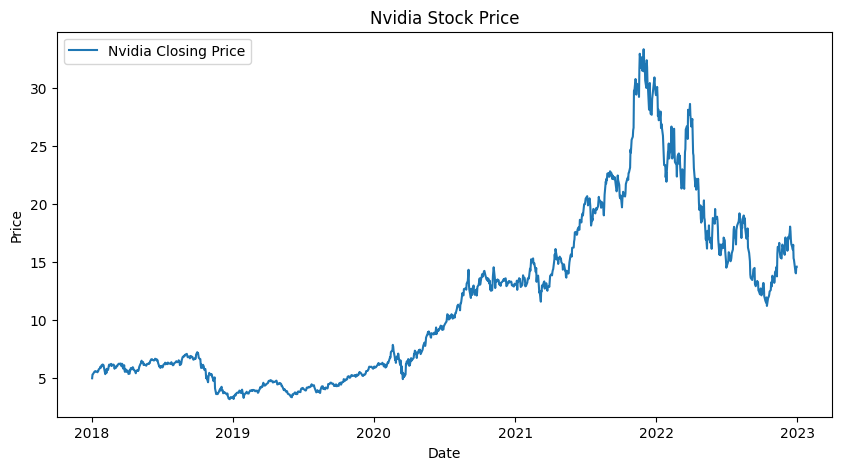

In [ ]:
# Download Nvidia stock data
stock_data = yf.download('NVDA', start='2018-01-01', end='2023-01-01')

# Focus on the 'Close' price for simplicity
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)

#Visualize data
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Nvidia Closing Price')
plt.title('Nvidia Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] < 0.05  # Returns True if data is stationary

# Check stationarity
print("Is the data stationary? ", check_stationarity(stock_data['Close']))

ADF Statistic: -1.189822058869551
p-value: 0.6779586092964145
Is the data stationary?  False


##Optimizing model

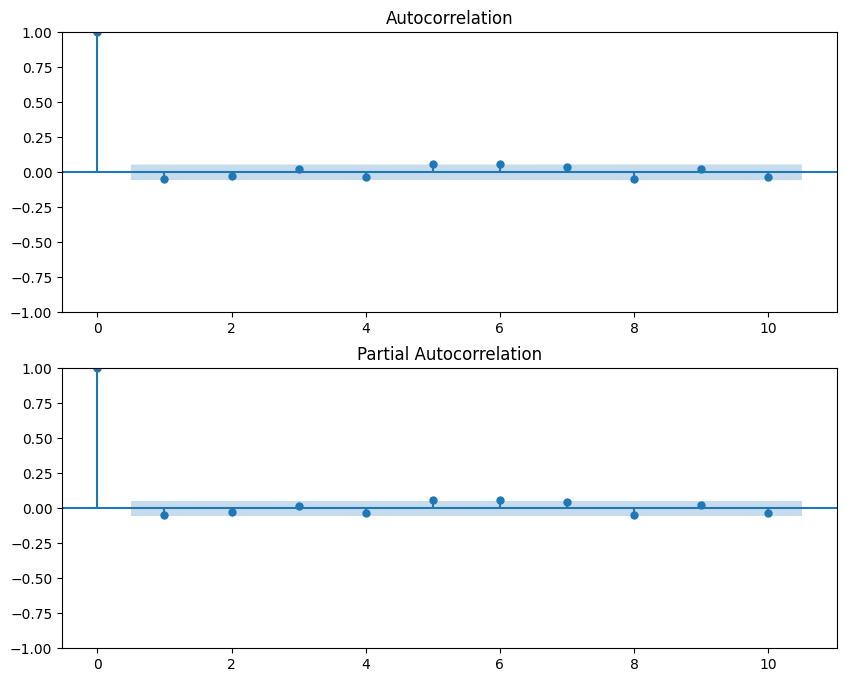

In [ ]:
#Looking at ACF/PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
stock_data_stationary = stock_data['Close'].diff().dropna()
#Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
#Make ACF plot
plot_acf(stock_data_stationary, lags=10, ax=ax1)
#PACF plot
plot_pacf(stock_data_stationary, lags=10, ax=ax2)

plt.show()
#Apprantly ARIMA(1,1,1) seem to be the best model

In [ ]:
#Search For best model with AIC and BIC

order_aic_bic = []

for p in range(3):
  for q in range(3):
    try:
      model = ARIMA(stock_data['Close'], order=(p,1,q))
      model_fit = model.fit()
      order_aic_bic.append((p, q, model_fit.aic, model_fit.bic))
    except:
      #Print AIC and BIC as None when fails
      order_aic_bic.append((p, q, None, None))

order_aic_bic = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
print(order_aic_bic.sort_values('aic'))
print(order_aic_bic.sort_values('bic'))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


   p  q          aic          bic
8  2  2  1680.854351  1706.540743
7  2  1  1680.946383  1701.495497
5  1  2  1681.142466  1701.691580
1  0  1  1682.742885  1693.017442
3  1  0  1682.885169  1693.159726
0  0  0  1683.394685  1688.531963
6  2  0  1683.843456  1699.255292
2  0  2  1683.919354  1699.331189
4  1  1  1684.323132  1699.734967
   p  q          aic          bic
0  0  0  1683.394685  1688.531963
1  0  1  1682.742885  1693.017442
3  1  0  1682.885169  1693.159726
6  2  0  1683.843456  1699.255292
2  0  2  1683.919354  1699.331189
4  1  1  1684.323132  1699.734967
7  2  1  1680.946383  1701.495497
5  1  2  1681.142466  1701.691580
8  2  2  1680.854351  1706.540743


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -835.427
Date:                Thu, 14 Nov 2024   AIC                           1680.854
Time:                        07:55:49   BIC                           1706.541
Sample:                             0   HQIC                          1690.508
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7070      0.081    -21.145      0.000      -1.865      -1.549
ar.L2         -0.8076      0.075    -10.703      0.000      -0.956      -0.660
ma.L1          1.6889      0.088     19.280      0.0

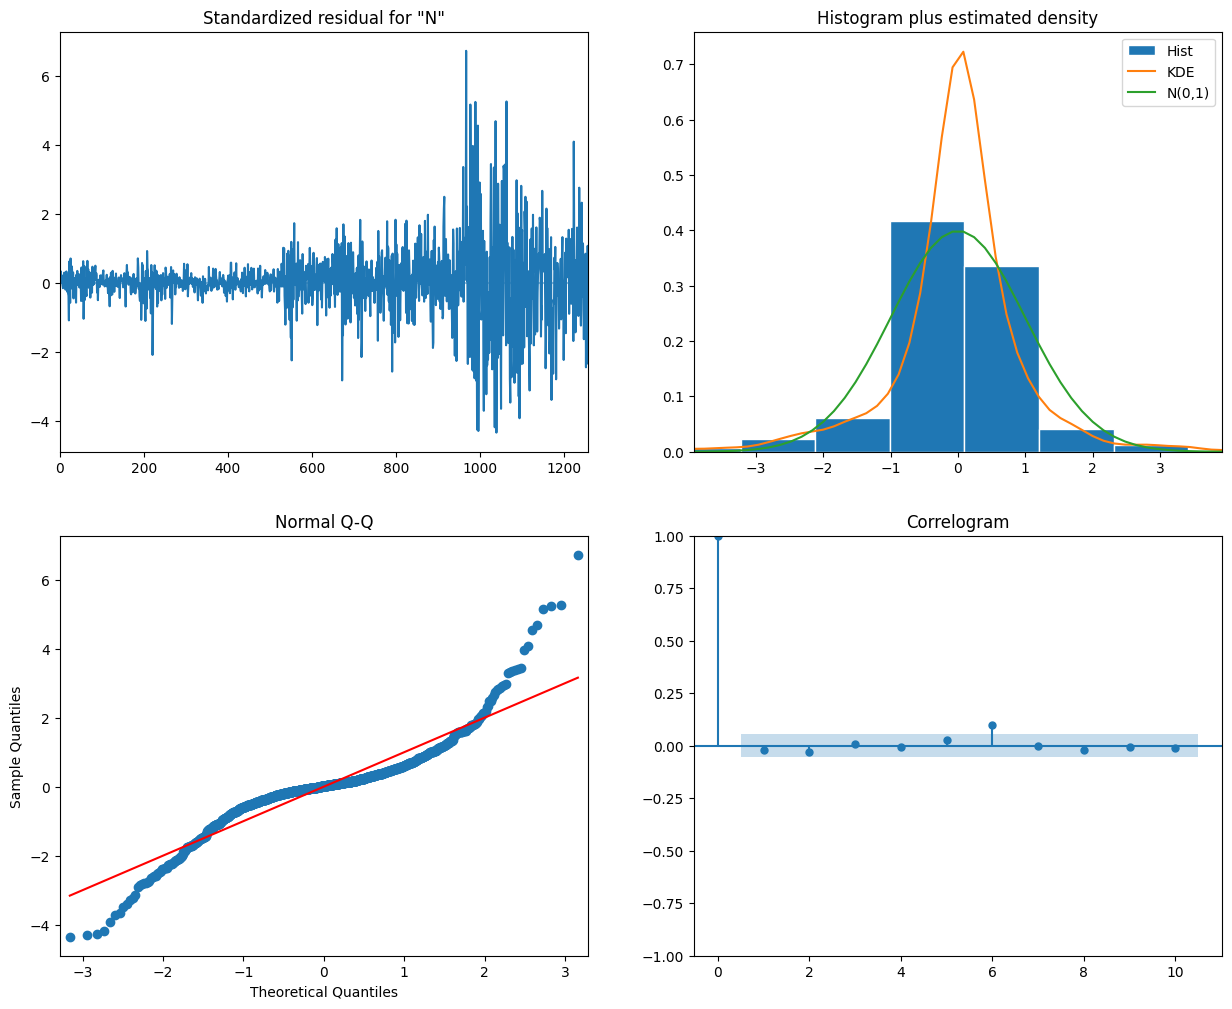

In [ ]:
#Model diagnostics
model = ARIMA(stock_data['Close'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()
#THese diagnostics plot doesn't look good

##Try to fix the problem

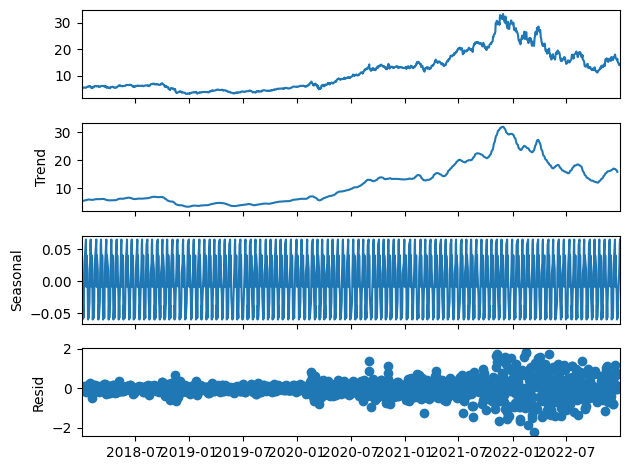

In [ ]:
#Try seasonal decomplse
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(stock_data['Close'],period=12)
decomp.plot()
plt.show()

In [ ]:
#Look for best SARIMA model order
!pip install pmdarima
from pmdarima.arima import auto_arima
results = auto_arima(stock_data['Close'], seasonal=True, m=6, d=1, start_p=2, start_q=2, trace=True, error_action='ignore', suppress_warnings=True)
print(results.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[6] intercept   : AIC=1672.783, Time=5.02 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=1685.064, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=1681.389, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=1681.350, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=1683.395, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[6] intercept   : AIC=1669.878, Time=8.00 sec
 ARIMA(2,1,2)(0,0,0)[6] intercept   : AIC=1684.200, Time=1.24 sec
 ARIMA(2,1,2)(0,0,2)[6] intercept   : AIC=1671.683, Time=7.83 sec
 ARIMA(2,1,2)(1,0,0)[6] intercept   : AIC=1669.586, Time=6.86 sec
 ARIMA(2,1,2)(2,0,0)[6] intercept   : AIC=1671.545, Time=9.18 sec
 ARIMA(2,1,2)(2,0,1)[6] intercept   : AIC=1673.545, Time=10.04 sec
 ARIMA(1,1,2)(1,0,0)[6] intercept   : AIC=1676.764, Time=1.90 sec
 ARIMA(2,1,1)(1,0,0)[6] intercept   : AIC=1676.196, Time=4.04 sec
 ARIMA(3,1,2)(1,0,0)[

In [ ]:
results = auto_arima(stock_data['Close'], seasonal=True, m=12, d=1, start_p=2, start_q=2, trace=True, error_action='ignore', suppress_warnings=True)
print(results.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1685.586, Time=17.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1685.064, Time=0.39 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1686.238, Time=3.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1686.085, Time=3.01 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1683.395, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1686.861, Time=1.67 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1686.859, Time=1.36 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1688.875, Time=1.58 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1684.524, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1684.379, Time=1.39 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1685.947, Time=2.44 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 32.904 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

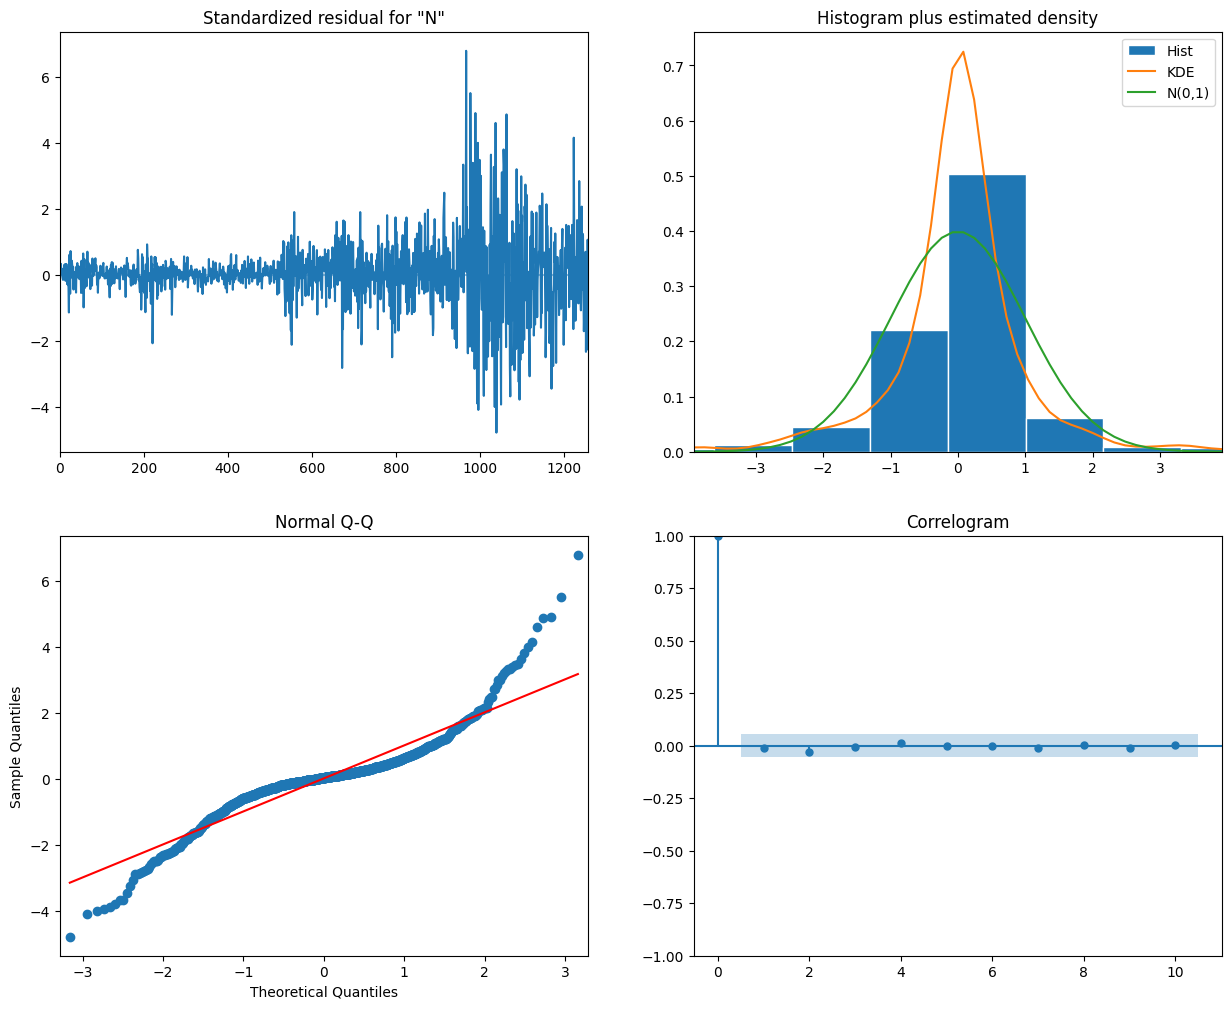

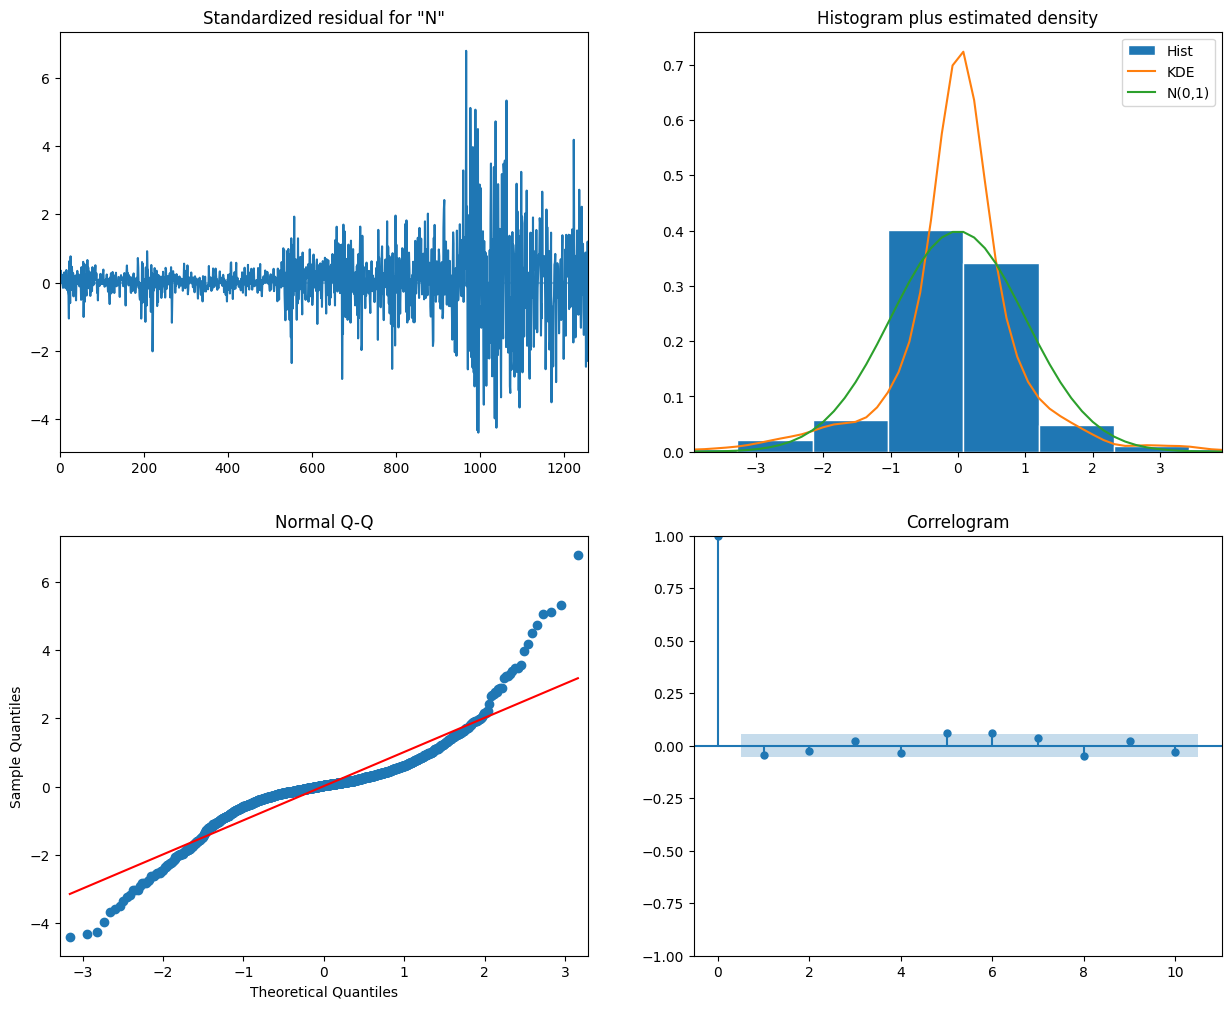

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(stock_data['Close'], order=(2,1,2),seasonal_order=(1,0,0,6))
model_fit = model.fit()
model_fit.plot_diagnostics(figsize=(15, 12))

model_2 = SARIMAX(stock_data['Close'], order=(0,1,0),seasonal_order=(0,0,0,12))
model_2_fit = model_2.fit()
model_2_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

##Fitting A Model(Work In progress)

In [ ]:
#!pip install bt

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

train_data = stock_data['Close'][:int(0.8 * len(stock_data['Close']))]
test_data = stock_data['Close'][int(0.8 * len(stock_data['Close'])):]

[*********************100%***********************]  1 of 1 completed


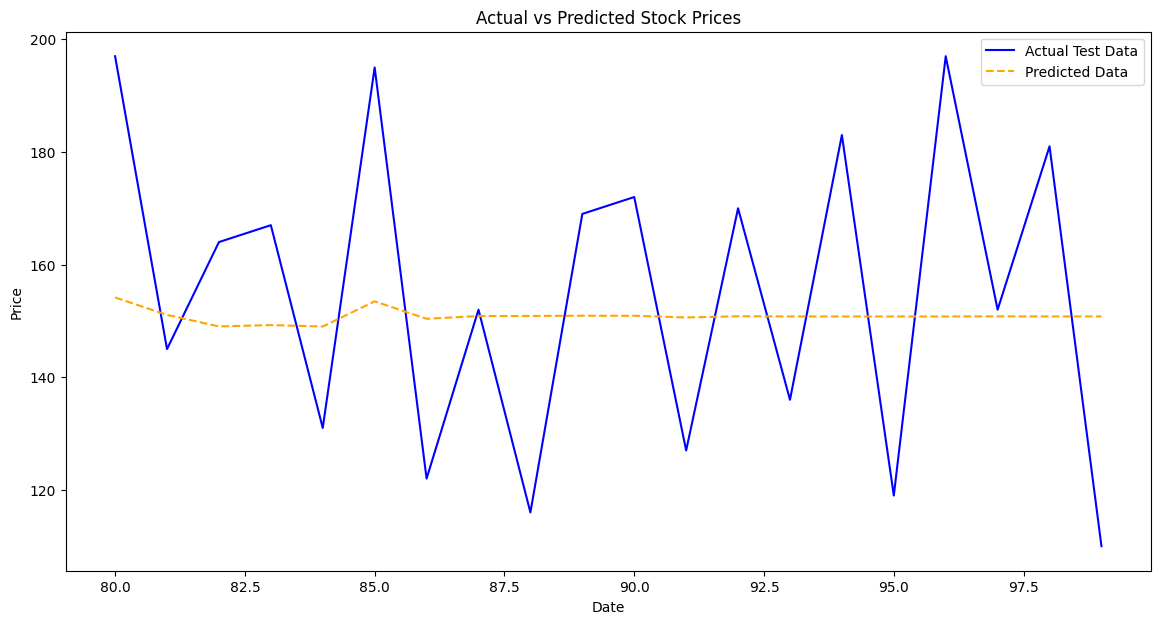

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

stock_data = yf.download('NVDA', start='2018-01-01', end='2023-01-01')

# Focus on the 'Close' price for simplicity
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)

# Sample data (replace with your actual stock data)
stock_data = pd.DataFrame({'Date': pd.date_range(start='2022-01-01', periods=100), 'Close': np.random.randint(100, 200, 100)})

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(stock_data) * 0.8)
train_data, test_data = stock_data['Close'][:train_size], stock_data['Close'][train_size:]

# Fit a SARIMAX model (adjust parameters as needed)
model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 0, 0, 6))
model_fit = model.fit()

# Generate forecast for test data
forecast = model_fit.forecast(steps=len(test_data))
forecast_index = test_data.index
forecast_series = pd.Series(forecast, index=forecast_index)

# Visualize actual vs predicted data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(test_data, label='Actual Test Data', color='blue')
plt.plot(forecast_series, label='Predicted Data', color='orange', linestyle='--')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

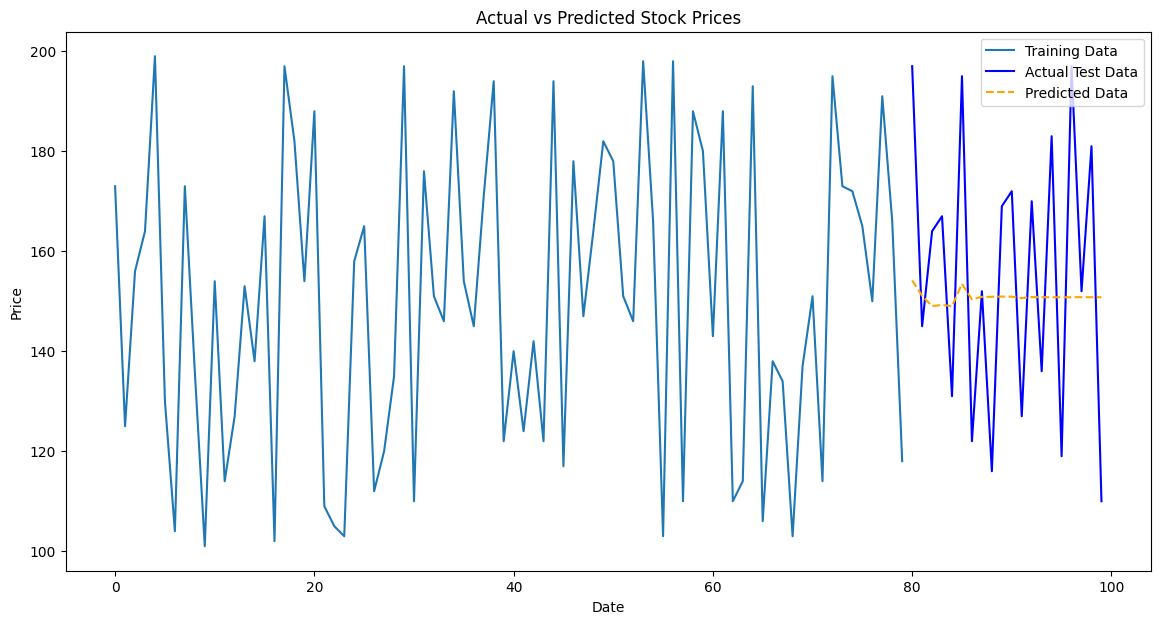

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted data
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data', color='blue')
plt.plot(forecast_series, label='Predicted Data', color='orange', linestyle='--')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# #Generate trading signals based on the forecasted values
# #Define a signal based on the difference between forecast and actual prices
# test_data_shifted = test_data.shift(1)  # Previous day's price for reference
# forecast_shifted = forecast_series.shift(1)  # Previous forecasted price

# # Align the indexes
# forecast_shifted, test_data_shifted = forecast_shifted.align(test_data_shifted, join='inner', axis=0)

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # Generate trading signals based on the forecasted values
# signals = pd.DataFrame(index=test_data_shifted.index)
# signals['price'] = test_data_shifted
# signals['forecast'] = forecast_shifted
# signals['signal'] = 0.0
# signals['signal'].iloc[1:] = np.where(signals['forecast'].iloc[1:] > signals['price'].iloc[1:], 1.0, -1.0)
# signals['positions'] = signals['signal'].diff()

# # Backtesting using bt library
# bt_data = signals[['price']].copy()
# bt_data.rename(columns={'price': 'Close'}, inplace=True)

# class SignalStrategy(bt.Algo):
#     def __init__(self, signals):
#         self.signals = signals

#     def __call__(self, target):
#         if target.now in self.signals.index:
#             signal = self.signals.loc[target.now, 'signal']
#             print(f"Date: {target.now}, Signal: {signal}")  # Debug line
#             if signal == 1.0:
#                 target.adjust(1)
#             elif signal == -1.0:
#                 target.adjust(0)


# strategy = bt.Strategy('SignalStrategy', [SignalStrategy(signals)])
# backtest = bt.Backtest(strategy, bt_data)
# result = bt.run(backtest)
# result.plot()
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import bt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # ... (your existing code for data loading, model fitting, and signal generation) ...

# class SignalStrategy(bt.Algo):
#     def __init__(self, signals):
#         self.signals = signals

#     def __call__(self, target):
#         if target.now in self.signals.index:
#             signal = self.signals.loc[target.now, 'signal']
#             if signal == 1.0:  # Buy signal
#                 target.adjust(1) # Adjust weight to 1 for buying
#             elif signal == -1.0:  # Sell signal
#                 target.adjust(0) # Adjust weight to 0 for selling

# # ... (rest of your code) ...

In [ ]:
# test_forecast = arima_result.forecast(steps=len(test_data))
# test_data = stock_data['Close'][train_size:].copy()
# test_data = pd.DataFrame(test_data) # Convert the series to dataframe

# predicted_df = pd.DataFrame({'Predicted_Close': test_forecast.values}, index=test_data.index)
# plt.plot(predicted_df)
# plt.plot(test_data)

# test_data = pd.concat([test_data, predicted_df], axis=1)

# test_data['Signal'] = np.where(test_data['Predicted_Close'] > test_data['Close'], 1, -1)

In [ ]:
#


#NVDA and AAPL stocks - Nita

In [ ]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install statsmodels

In [ ]:
!pip install yfinance


## Moving Average

### MA - NVDA

In [ ]:
import yfinance as yf
nvda = yf.download('NVDA', start='2024-1-1', end='2024-10-31')
plt.plot(nvda['Adj Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


NameError: name 'plt' is not defined

In [ ]:
nvda['sma_50_nvda']=nvda['Adj Close'].rolling(window=50).mean()
nvda['sma_10_nvda']=nvda['Adj Close'].rolling(window=10).mean()
import matplotlib.pyplot as plt
plt.plot(nvda['sma_10_nvda'], label='SMA_10_nvda')
plt.plot(nvda['sma_50_nvda'], label='SMA_50_nvda')
plt.legend()
plt.show()

### MA-AAPL

[*********************100%***********************]  1 of 1 completed


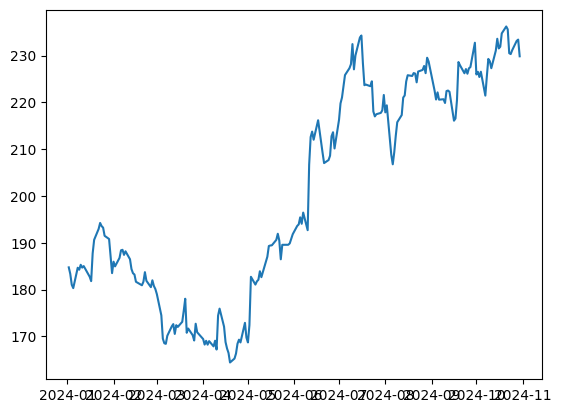

In [ ]:
aapl = yf.download('AAPL', start='2024-1-1', end='2024-10-31')
plt.plot(aapl['Adj Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


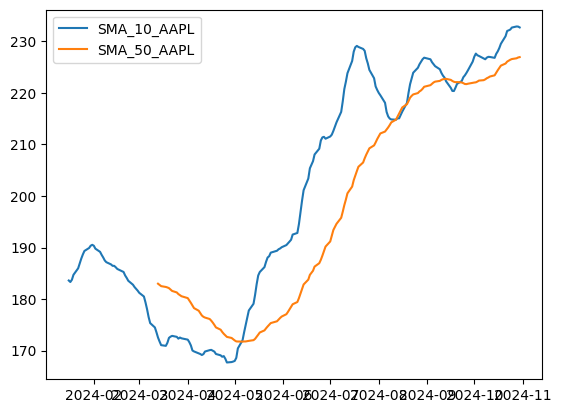

In [ ]:
aapl = yf.download('AAPL', start='2024-1-1', end='2024-10-31')
aapl['sma_50_AAPL']=aapl['Adj Close'].rolling(window=50).mean()
aapl['sma_10_AAPL']=aapl['Adj Close'].rolling(window=10).mean()
import matplotlib.pyplot as plt
plt.plot(aapl['sma_10_AAPL'], label='SMA_10_AAPL')
plt.plot(aapl['sma_50_AAPL'], label='SMA_50_AAPL')
plt.legend()
plt.show()

###Back Test + Optimizing

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Returns for Different Moving Average Pairs:
  MA_Pair  NVDA_Return  AAPL_Return
0    5/20     1.804307     0.417896
1   10/50     1.567777     0.424793
2  20/100     1.954775     0.402991
3  50/200     1.951463     0.170976


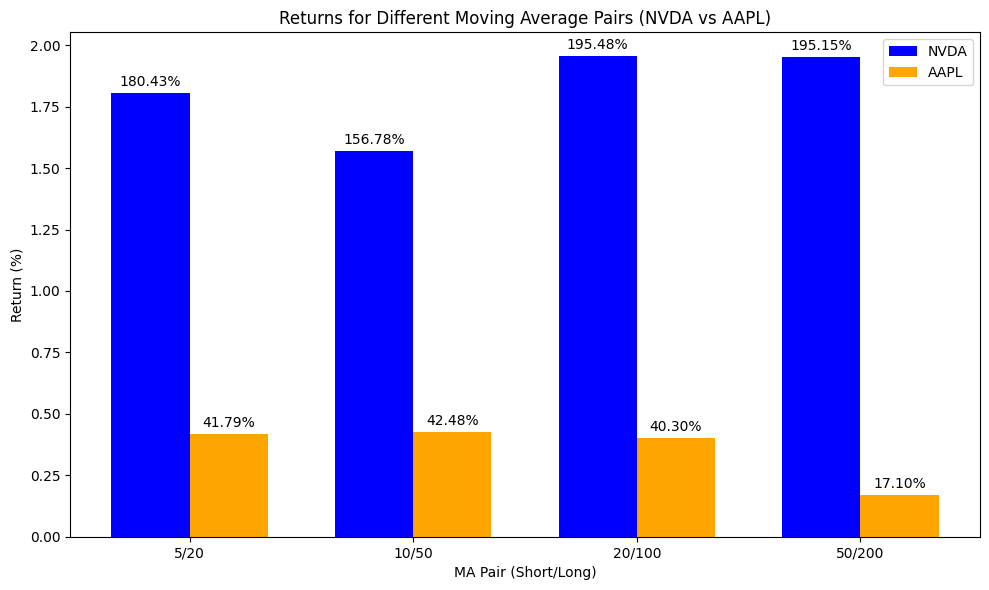

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data for NVDA and AAPL
def download_data(ticker, start_date="2023-01-01"):
    return yf.download(ticker, start=start_date)["Close"]

nvda_data = download_data("NVDA")
aapl_data = download_data("AAPL")

# Function to generate signals based on short and long moving averages
def generate_signals(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['short_mavg'] = data.rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = data.rolling(window=long_window, min_periods=1).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to backtest the moving average strategy
def backtest(data, signals, initial_capital=10000.0):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['position'] = signals['signal'] * initial_capital / signals['price']

    # Portfolio value calculation
    portfolio = positions.multiply(signals['price'], axis=0)
    pos_diff = positions['position'].diff()
    portfolio['holdings'] = positions['position'] * signals['price']
    portfolio['cash'] = initial_capital - (pos_diff * signals['price']).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    final_return = (portfolio['total'][-1] - initial_capital) / initial_capital
    return final_return

# Define moving average pairs for comparison
ma_pairs = [(5, 20), (10, 50), (20, 100), (50, 200)]
returns = []

# Calculate returns for each MA pair and stock
for short_window, long_window in ma_pairs:
    nvda_signals = generate_signals(nvda_data, short_window, long_window)
    aapl_signals = generate_signals(aapl_data, short_window, long_window)

    nvda_return = backtest(nvda_data, nvda_signals)
    aapl_return = backtest(aapl_data, aapl_signals)

    returns.append((f"{short_window}/{long_window}", nvda_return, aapl_return))

# Convert results to DataFrame for easy viewing and printing
results_df = pd.DataFrame(returns, columns=['MA_Pair', 'NVDA_Return', 'AAPL_Return'])
print("Returns for Different Moving Average Pairs:")
print(results_df)

# Plotting the returns for different MA pairs
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results_df))

# Bar plots for NVDA and AAPL returns
nvda_bars = ax.bar(index, results_df['NVDA_Return'], bar_width, label='NVDA', color='blue')
aapl_bars = ax.bar(index + bar_width, results_df['AAPL_Return'], bar_width, label='AAPL', color='orange')

# Adding labels and titles
ax.set_xlabel('MA Pair (Short/Long)')
ax.set_ylabel('Return (%)')
ax.set_title('Returns for Different Moving Average Pairs (NVDA vs AAPL)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df['MA_Pair'])
ax.legend()

# Add data labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(nvda_bars)
add_labels(aapl_bars)

plt.tight_layout()
plt.show()


#### Random Code

[*********************100%***********************]  1 of 1 completed


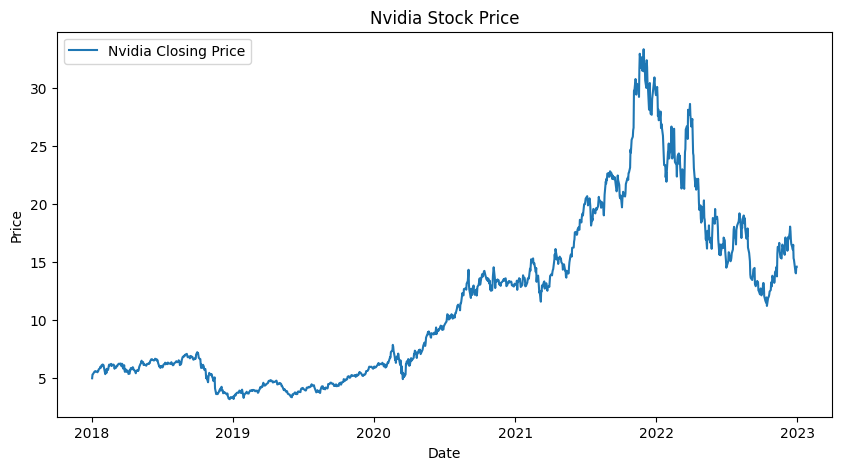

In [ ]:
# Download Nvidia stock data
stock_data = yf.download('NVDA', start='2018-01-01', end='2023-01-01')

# Focus on the 'Close' price for simplicity
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)

#Visualize data
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Nvidia Closing Price')
plt.title('Nvidia Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


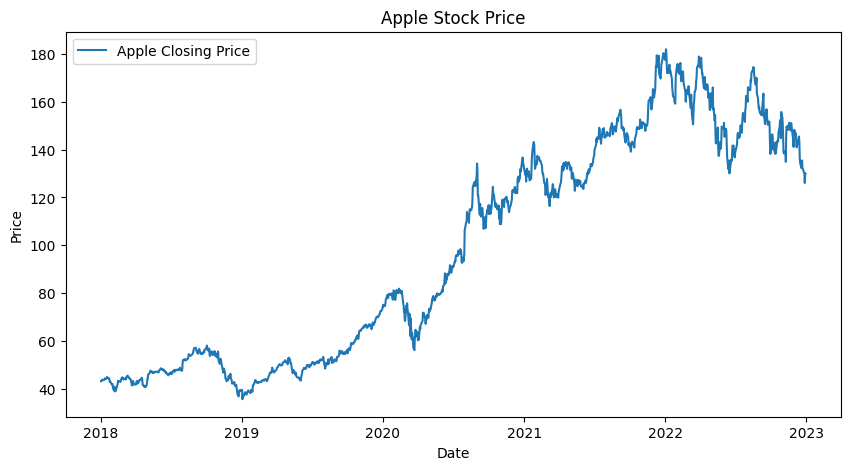

In [ ]:
# Download Nvidia stock data
stock_data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Focus on the 'Close' price for simplicity
stock_data = stock_data[['Close']]
stock_data.dropna(inplace=True)

#Visualize data
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Apple Closing Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

##RSI

### RSI NVDA



In [ ]:
import yfinance as yf
bbca = yf.download('NVDA', start='2024-1-1', end='2024-10-31')

[*********************100%***********************]  1 of 1 completed


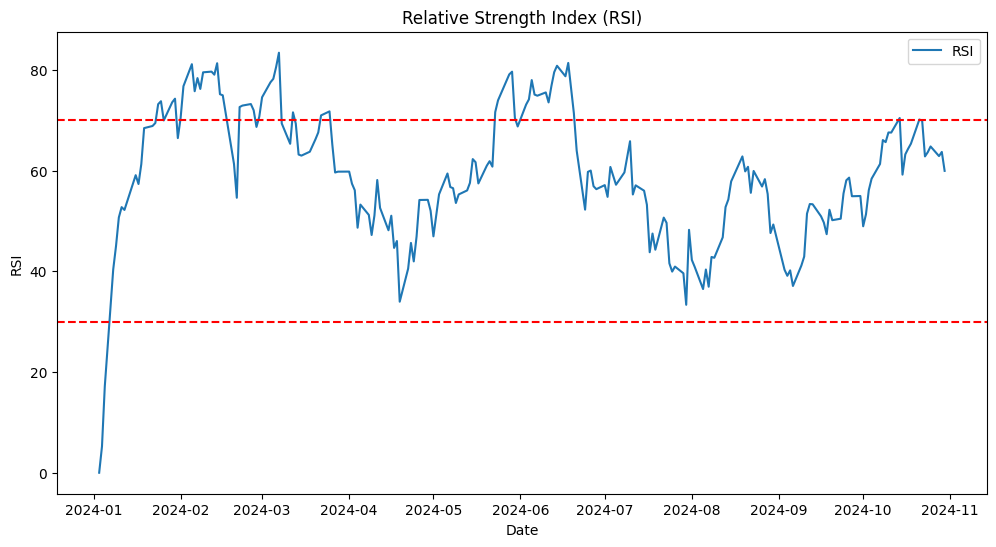

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def RSI(bbca, period=14):
    delta = bbca["Adj Close"].diff(1)
    delta = delta.dropna()
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the EWMA
    roll_up1 = up.ewm(com=period - 1, adjust=False).mean()
    roll_down1 = down.ewm(com=period - 1, adjust=False).mean().abs()

    # Calculate the RS
    RS = roll_up1 / roll_down1

    # Calculate the RSI
    RSI = 100.0 - (100.0 / (1.0 + RS))

    bbca['RSI'] = RSI
    return bbca

# Example usage:
# Assuming you have a DataFrame 'df' with 'Adj Close' column
bbca = RSI(bbca, period=14)

# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(bbca.index, bbca['RSI'], label='RSI')
plt.axhline(30, color='r', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

### RSI AAPL

In [ ]:
import yfinance as yf
bbri = yf.download('AAPL', start='2024-1-1', end='2024-10-31')

[*********************100%***********************]  1 of 1 completed


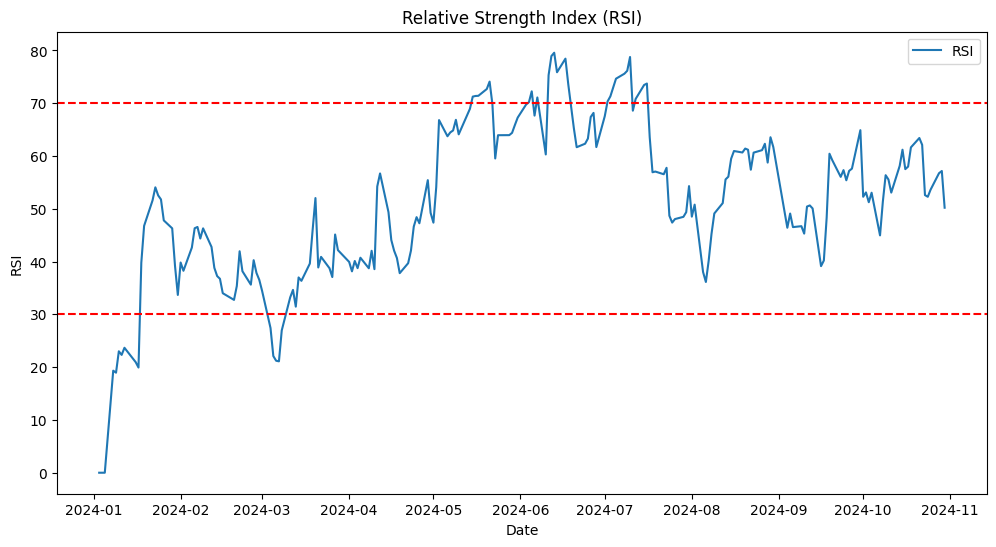

In [ ]:
def RSI(bbri, period=14):
    gama = bbri["Adj Close"].diff(1)
    gama = gama.dropna()
    bbriup = gama.copy()
    bbridown = gama.copy()
    bbriup[bbriup < 0] = 0
    bbridown[bbridown > 0] = 0

    # Calculate the EWMA
    roll_up1 = bbriup.ewm(com=period - 1, adjust=False).mean()
    roll_down1 = bbridown.ewm(com=period - 1, adjust=False).mean().abs()

    # Calculate the RS
    RS = roll_up1 / roll_down1

    # Calculate the RSI
    RSI = 100.0 - (100.0 / (1.0 + RS))

    bbri['RSI'] = RSI
    return bbri

# Example usage:
# Assuming you have a DataFrame 'df' with 'Adj Close' column
bbri = RSI(bbri, period=14)

# Plot the RSI
plt.figure(figsize=(12, 6))
plt.plot(bbri.index, bbri['RSI'], label='RSI')
plt.axhline(30, color='r', linestyle='--')
plt.axhline(70, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

###Backtest + Optimizing

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Returns for Different RSI Threshold Pairs:
  RSI_Thresholds  NVDA_Return  AAPL_Return
0          30/70     0.216207     0.048080
1          20/80    -0.036566     0.032520
2          25/75     0.104845     0.002174
3          35/65     0.443424     0.049245
4          40/60     0.340241     0.124619


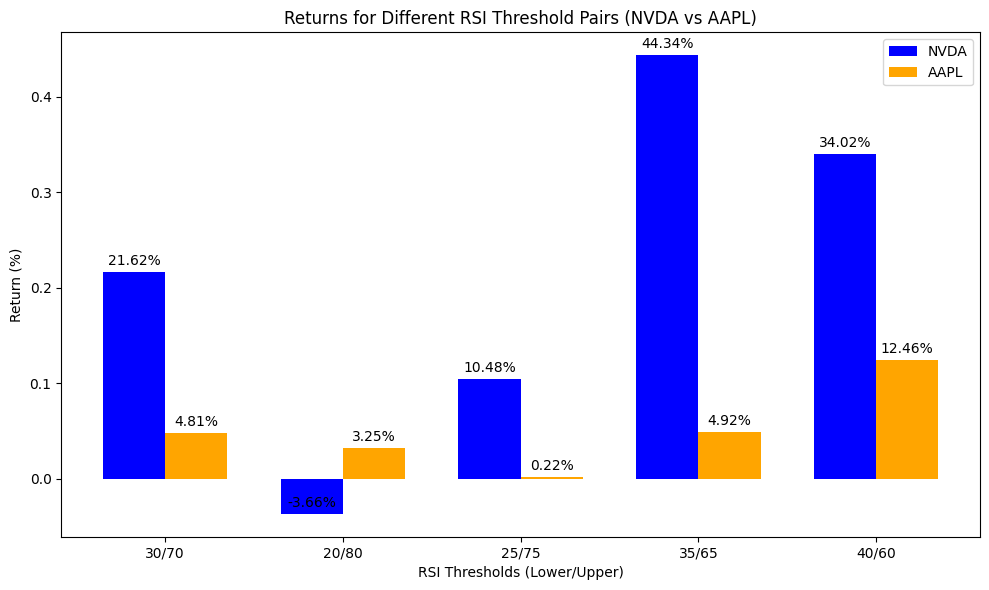

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data for NVDA and AAPL
def download_data(ticker, start_date="2023-01-01"):
    return yf.download(ticker, start=start_date)["Close"]

nvda_data = download_data("NVDA")
aapl_data = download_data("AAPL")

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to generate RSI-based signals
def generate_rsi_signals(data, rsi_period, lower_threshold, upper_threshold):
    signals = pd.DataFrame(index=data.index)
    signals['price'] = data
    signals['rsi'] = calculate_rsi(data, rsi_period)
    signals['signal'] = 0.0

    # Buy when RSI goes below the lower threshold, sell when above the upper threshold
    signals['signal'] = np.where(signals['rsi'] < lower_threshold, 1.0,
                                 np.where(signals['rsi'] > upper_threshold, 0.0, signals['signal'].shift()))
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to backtest the RSI-based strategy
def backtest(data, signals, initial_capital=10000.0):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['position'] = signals['signal'] * initial_capital / signals['price']

    # Portfolio value calculation
    portfolio = positions.multiply(signals['price'], axis=0)
    pos_diff = positions['position'].diff()
    portfolio['holdings'] = positions['position'] * signals['price']
    portfolio['cash'] = initial_capital - (pos_diff * signals['price']).cumsum()
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']
    final_return = (portfolio['total'][-1] - initial_capital) / initial_capital
    return final_return

# Define RSI threshold pairs for comparison
rsi_period = 14
rsi_thresholds = [(30, 70), (20, 80), (25, 75), (35, 65), (40, 60)]
returns = []

# Calculate returns for each RSI threshold pair
for lower_threshold, upper_threshold in rsi_thresholds:
    nvda_signals = generate_rsi_signals(nvda_data, rsi_period, lower_threshold, upper_threshold)
    aapl_signals = generate_rsi_signals(aapl_data, rsi_period, lower_threshold, upper_threshold)

    nvda_return = backtest(nvda_data, nvda_signals)
    aapl_return = backtest(aapl_data, aapl_signals)

    returns.append((f"{lower_threshold}/{upper_threshold}", nvda_return, aapl_return))

# Convert results to DataFrame for easy viewing and printing
results_df = pd.DataFrame(returns, columns=['RSI_Thresholds', 'NVDA_Return', 'AAPL_Return'])
print("Returns for Different RSI Threshold Pairs:")
print(results_df)

# Plotting the returns for different RSI threshold pairs
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(results_df))

# Bar plots for NVDA and AAPL returns
nvda_bars = ax.bar(index, results_df['NVDA_Return'], bar_width, label='NVDA', color='blue')
aapl_bars = ax.bar(index + bar_width, results_df['AAPL_Return'], bar_width, label='AAPL', color='orange')

# Adding labels and titles
ax.set_xlabel('RSI Thresholds (Lower/Upper)')
ax.set_ylabel('Return (%)')
ax.set_title('Returns for Different RSI Threshold Pairs (NVDA vs AAPL)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df['RSI_Thresholds'])
ax.legend()

# Add data labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(nvda_bars)
add_labels(aapl_bars)

plt.tight_layout()
plt.show()


## ARIMA - BBCA

In [ ]:
import yfinance as yf
bbca = yf.download('BBCA.JK', start='2024-1-1', end='2024-10-31')
!pip install seaborn
from statsmodels.tsa.stattools import adfuller, coint

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

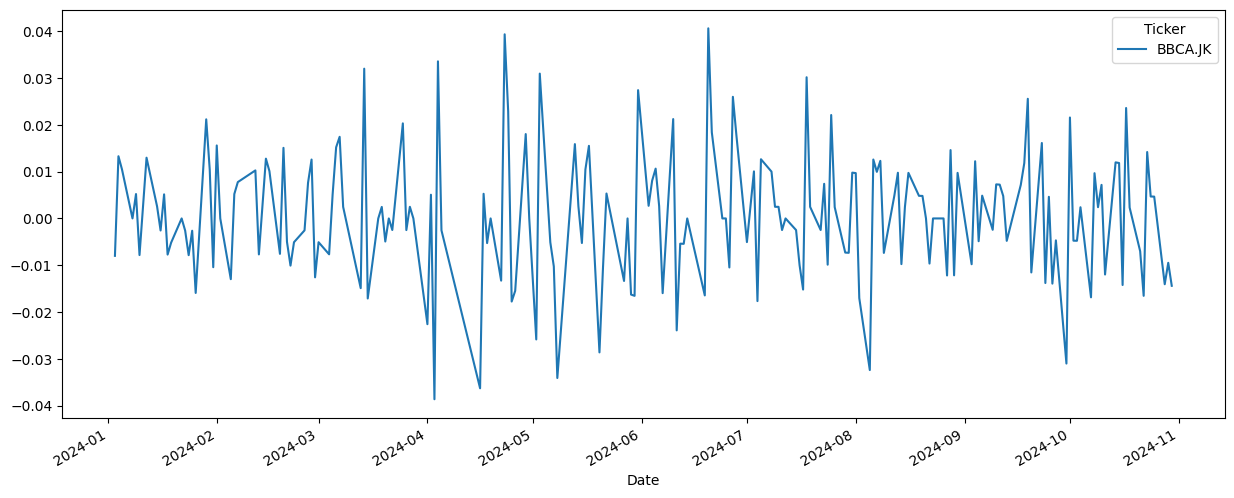

In [ ]:
# Compute daily log returns
log_returns_bbca = np.log(bbca['Adj Close'].pct_change() + 1)

# Drop null values
log_returns_bbca.dropna(inplace=True)

# Plot log returns
log_returns_bbca.plot(figsize=(15, 6))

In [ ]:
# Check whether log returns are stationary or not
result = adfuller(log_returns_bbca)
result

(-12.583652525202643,
 1.8864660567083813e-23,
 1,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 -1030.30784296581)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(bbca['Adj Close'], order =(1,0,0))
trained_model=model.fit()
print(trained_model.summary())

                               SARIMAX Results                                
Dep. Variable:                BBCA.JK   No. Observations:                  197
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1244.678
Date:                Thu, 14 Nov 2024   AIC                           2495.356
Time:                        07:59:05   BIC                           2505.206
Sample:                             0   HQIC                          2499.343
                                - 197                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9903.2803    195.933     50.544      0.000    9519.259    1.03e+04
ar.L1          0.9594      0.021     46.466      0.000       0.919       1.000
sigma2      1.778e+04   1697.671     10.471      0.0

### ARIMA - BBRI

In [ ]:
import yfinance as yf
bbri = yf.download('BBRI.JK', start='2024-1-1', end='2024-10-31')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

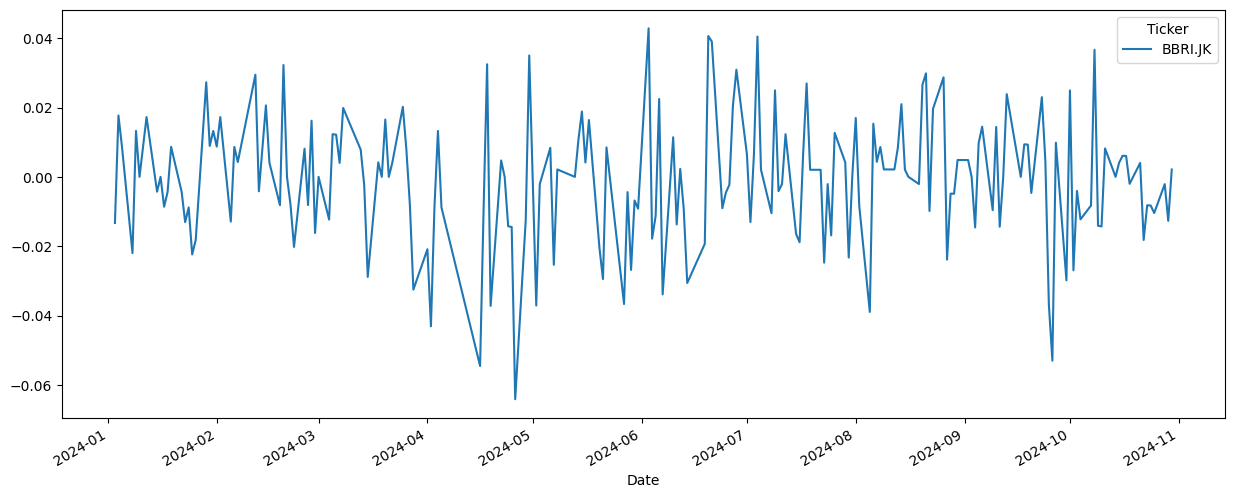

In [ ]:
# Compute daily log returns
log_returns_bbri = np.log(bbri['Adj Close'].pct_change() + 1)

# Drop null values
log_returns_bbri.dropna(inplace=True)

# Plot log returns
log_returns_bbri.plot(figsize=(15, 6))

In [ ]:
# Check whether log returns are stationary or not
result = adfuller(log_returns_bbri)
result

(-13.910430381339703,
 5.523292357359525e-26,
 0,
 195,
 {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 -913.9617644022812)

In [ ]:
# Define a model with AR=3, I=1 and MA=3
model_bbri = ARIMA(bbri['Adj Close'].values, order=(3, 1, 3))

# Fitting the model, disp=0 is to switch off verbose display
trained_model_bbri = model_bbri.fit()

# Printing a summary of the model
print(trained_model_bbri.summary())

### BOLINGER BANDS - BBCA BBRI

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch the data
ticker1 = "NVDA"
ticker2 = "AAPL"
start_date = "2024-01-01"
end_date = "2024-10-31"

data1 = yf.download(ticker1, start=start_date, end=end_date)
data2 = yf.download(ticker2, start=start_date, end=end_date)

# Function to calculate Bollinger Bands
def bollinger_bands(df, window=20, std_dev=2):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()

    df['Bollinger_Mid'] = rolling_mean
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * std_dev)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * std_dev)

    return df

# Calculate Bollinger Bands for BBRI and BBCA
data1 = bollinger_bands(data1)
data2 = bollinger_bands(data2)

# Visualize the Bollinger Bands
plt.figure(figsize=(15, 8))

# Plot NVDA
plt.subplot(2, 1, 1)
plt.plot(data1.index, data1['Close'], label='NVDA Closing Price')
plt.plot(data1.index, data1['Bollinger_Mid'], label='NVDA Middle Band')
plt.plot(data1.index, data1['Bollinger_Upper'], label='NVDA Upper Band')
plt.plot(data1.index, data1['Bollinger_Lower'], label='NVDa Lower Band')
plt.title('NVDA Bollinger Bands')
plt.legend()

# Plot AAPL
plt.subplot(2, 1, 2)
plt.plot(data2.index, data2['Close'], label='AAPL Closing Price')
plt.plot(data2.index, data2['Bollinger_Mid'], label='AAPL Middle Band')
plt.plot(data2.index, data2['Bollinger_Upper'], label='AAPL Upper Band')
plt.plot(data2.index, data2['Bollinger_Lower'], label='AAPL Lower Band')
plt.title('AAPL Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch the data
ticker = "NVDA"  # You can test on one stock first
start_date = "2024-01-01"
end_date = "2024-10-31"
df = yf.download(ticker, start=start_date, end=end_date)

# Function to calculate Bollinger Bands
def bollinger_bands(df, window, std_dev):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()
    df['Bollinger_Mid'] = rolling_mean
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * std_dev)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * std_dev)
    return df

# Function to simulate a simple Bollinger Bands strategy
def bollinger_strategy(df):
    df['Position'] = np.where(df['Close'] < df['Bollinger_Lower'], 1, 0)  # Buy signal
    df['Position'] = np.where(df['Close'] > df['Bollinger_Upper'], -1, df['Position'])  # Sell signal
    df['Position'] = df['Position'].shift()  # Shift to avoid look-ahead bias
    df['Returns'] = df['Close'].pct_change()
    df['Strategy_Returns'] = df['Position'] * df['Returns']
    return df['Strategy_Returns'].cumsum()[-1]  # Return cumulative strategy returns

# Define parameter ranges
window_range = [20, 30, 50]  # Different moving average windows
std_dev_range = [1, 2, 3]    # Different standard deviations

# Dictionary to store results
results = {}

# Loop through parameter combinations
for window in window_range:
    for std_dev in std_dev_range:
        data_copy = data.copy()  # Work with a copy to avoid modifying original data
        data_copy = bollinger_bands(data_copy, window, std_dev)
        strategy_return = bollinger_strategy(data_copy)
        results[(window, std_dev)] = strategy_return

# Find the best combination
best_params = max(results, key=results.get)
best_return = results[best_params]

print(f"Best Parameters: MA Window = {best_params[0]}, Std Dev = {best_params[1]}")
print(f"Best Strategy Return: {best_return:.2%}")

# Plot the best-performing strategy
optimal_data = bollinger_bands(data.copy(), best_params[0], best_params[1])

plt.figure(figsize=(15, 8))
plt.plot(optimal_data.index, optimal_data['Close'], label='Closing Price')
plt.plot(optimal_data.index, optimal_data['Bollinger_Mid'], label='Middle Band')
plt.plot(optimal_data.index, optimal_data['Bollinger_Upper'], label='Upper Band')
plt.plot(optimal_data.index, optimal_data['Bollinger_Lower'], label='Lower Band')
plt.fill_between(optimal_data.index, optimal_data['Bollinger_Lower'], optimal_data['Bollinger_Upper'], color='gray', alpha=0.1)
plt.title(f'Optimal Bollinger Bands (MA={best_params[0]}, Std Dev={best_params[1]})')
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch the data
ticker = "NVDA"  # You can test on one stock first
start_date = "2024-01-01"
end_date = "2024-10-31"
df = yf.download(ticker, start=start_date, end=end_date)

In [ ]:
# Function to calculate Bollinger Bands
def bollinger_bands(df, window, std_dev):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()
    df['Bollinger_Mid'] = rolling_mean
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * std_dev)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * std_dev)
    return df

# Function to simulate a simple Bollinger Bands strategy
def bollinger_strategy(df):
    df['Position'] = np.where(df['Close'] < df['Bollinger_Lower'], 1, 0)  # Buy signal
    df['Position'] = np.where(df['Close'] > df['Bollinger_Upper'], -1, df['Position'])  # Sell signal
    df['Position'] = df['Position'].shift()  # Shift to avoid look-ahead bias
    df['Returns'] = df['Close'].pct_change()
    df['Strategy_Returns'] = df['Position'] * df['Returns']
    return df['Strategy_Returns'].cumsum()[-1]  # Return cumulative strategy returns

# Define parameter ranges
window_range = [20, 30, 50]  # Different moving average windows
std_dev_range = [1, 2, 3]    # Different standard deviations

# Dictionary to store results
results = {}

# Loop through parameter combinations
for window in window_range:
    for std_dev in std_dev_range:
        data_copy = data.copy()  # Work with a copy to avoid modifying original data
        data_copy = bollinger_bands(data_copy, window, std_dev)
        strategy_return = bollinger_strategy(data_copy)
        results[(window, std_dev)] = strategy_return

# Find the best combination
best_params = max(results, key=results.get)
best_return = results[best_params]

print(f"Best Parameters: MA Window = {best_params[0]}, Std Dev = {best_params[1]}")
print(f"Best Strategy Return: {best_return:.2%}")

# Plot the best-performing strategy
optimal_data = bollinger_bands(data.copy(), best_params[0], best_params[1])

plt.figure(figsize=(15, 8))
plt.plot(optimal_data.index, optimal_data['Close'], label='Closing Price')
plt.plot(optimal_data.index, optimal_data['Bollinger_Mid'], label='Middle Band')
plt.plot(optimal_data.index, optimal_data['Bollinger_Upper'], label='Upper Band')
plt.plot(optimal_data.index, optimal_data['Bollinger_Lower'], label='Lower Band')
plt.fill_between(optimal_data.index, optimal_data['Bollinger_Lower'], optimal_data['Bollinger_Upper'], color='gray', alpha=0.1)
plt.title(f'Optimal Bollinger Bands (MA={best_params[0]}, Std Dev={best_params[1]})')
plt.legend()
plt.show()

In [ ]:
df['Position'] = df['Position'].shift()  # Shift to avoid look-ahead bias
df = df.dropna()  # Drop rows with NaN values to ensure alignment
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Position'] * df['Returns']

### COINTEGRATION - BBRI BBCA

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
ticker1 = "BBRI.JK"
ticker2 = "BBCA.JK"
start_date = "2024-01-01"
end_date = "2024-10-31"

data1 = yf.download(ticker1, start=start_date, end=end_date)
data2 = yf.download(ticker2, start=start_date, end=end_date)

# Merge the dataframes
data = data1.merge(data2, on='Date')

In [ ]:
# Check for cointegration
result = sm.tsa.stattools.coint(data1['Adj Close'], data2['Adj Close'])
print(result)

In [ ]:
import yfinance as yf
bbri = yf.download('BBRI.JK', start='2024-1-1', end='2024-10-31')
bbca = yf.download('BBCA.JK', start='2024-1-1', end='2024-10-31')

In [ ]:
# Check for cointegration
result = sm.tsa.stattools.coint(data1["Adj Close"], data2["Adj Close"])
print(result)

In [ ]:
# Calculate the spread
# data1_aligned['spread'] = data1_aligned['Adj Close'] - data2_aligned['Adj Close']

In [ ]:
# # Reindex to a common index
# common_index = data1.index.intersection(data2.index)
# data1_aligned = data1.reindex(common_index)
# data2_aligned = data2.reindex(common_index)

# # Calculate spread
# data['spread'] = data1_aligned['Adj Close'] - data2_aligned['Adj Close']

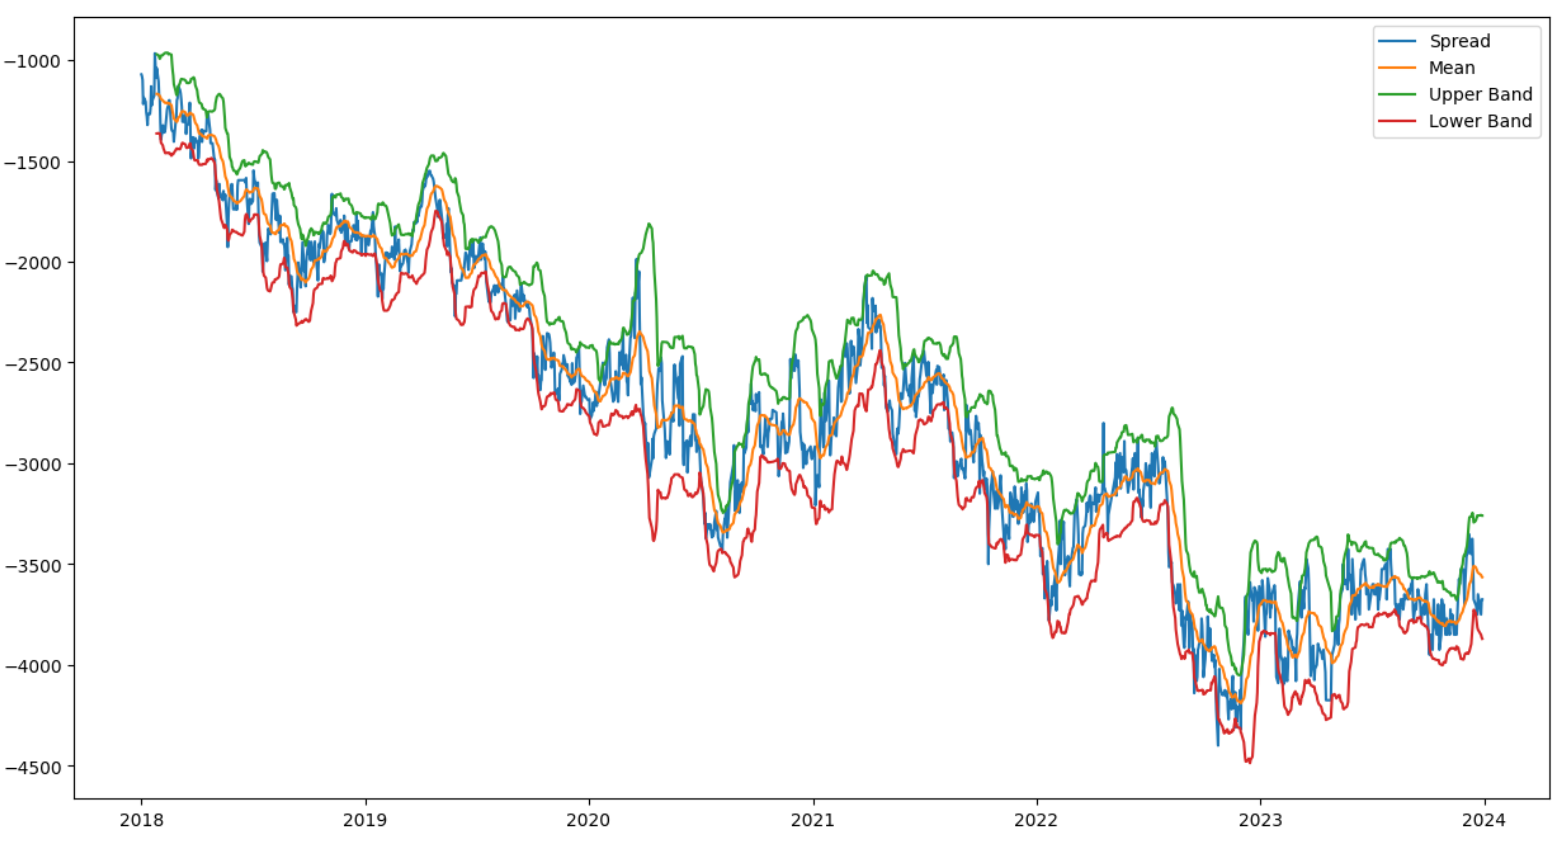